In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
from google.colab import files
uploaded=files.upload()


Saving abalone.csv to abalone.csv


In [4]:
data = pd.read_csv("abalone.csv")
data

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [5]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight   Age  
0         0.150  16.5  
1         0.070   8.5  
2         0.210  10.5  
3         0.155  11.5  
4         0.055   8.5

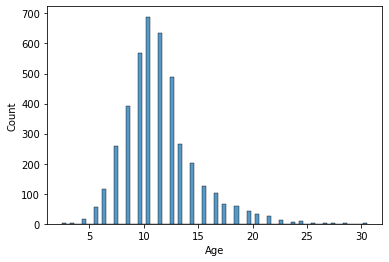

In [6]:
sns.histplot(data["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


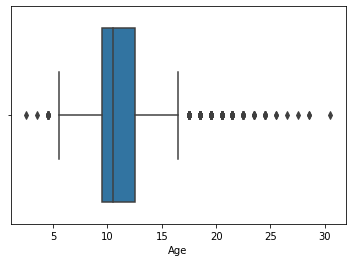

In [7]:
sns.boxplot(data['Age'])

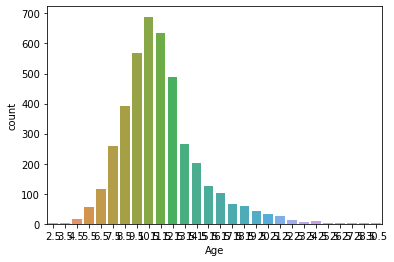

In [8]:
sns.countplot(x=data.Age)

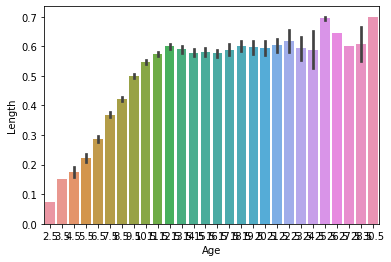

In [9]:
sns.barplot(x=data.Age, y=data.Length)

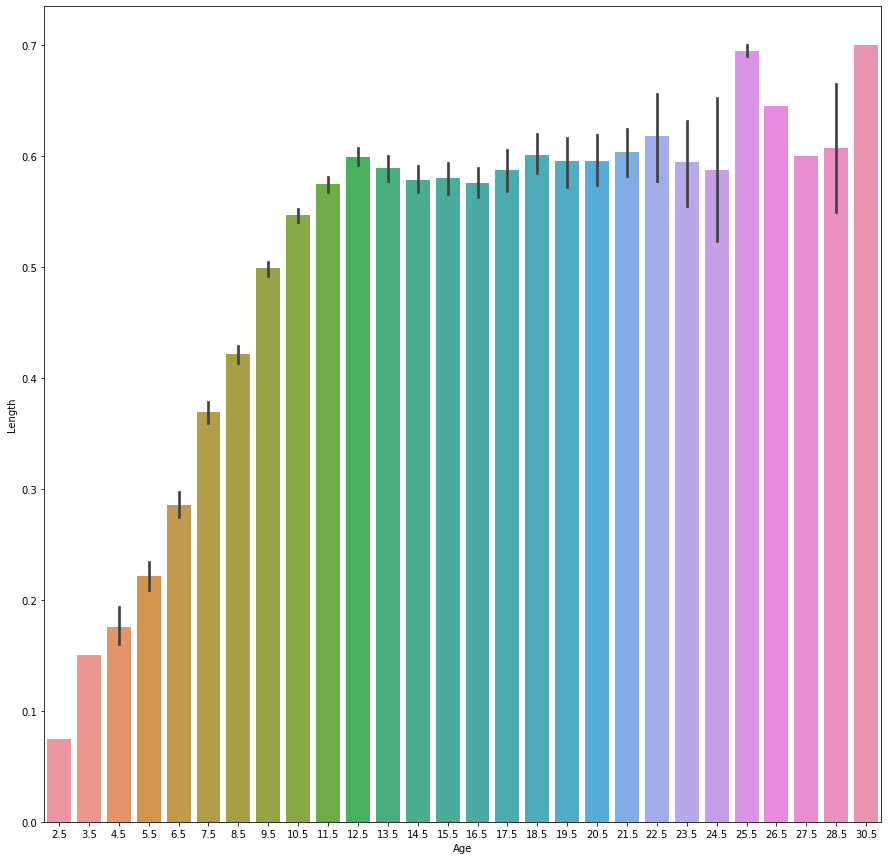

In [10]:
plt.figure(figsize=(15,15))
sns.barplot(x=data.Age , y=data.Length)

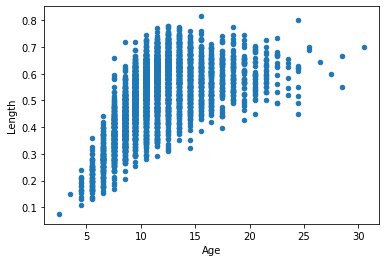

In [17]:
data.plot(kind ="scatter", x= "Age", y = "Length")

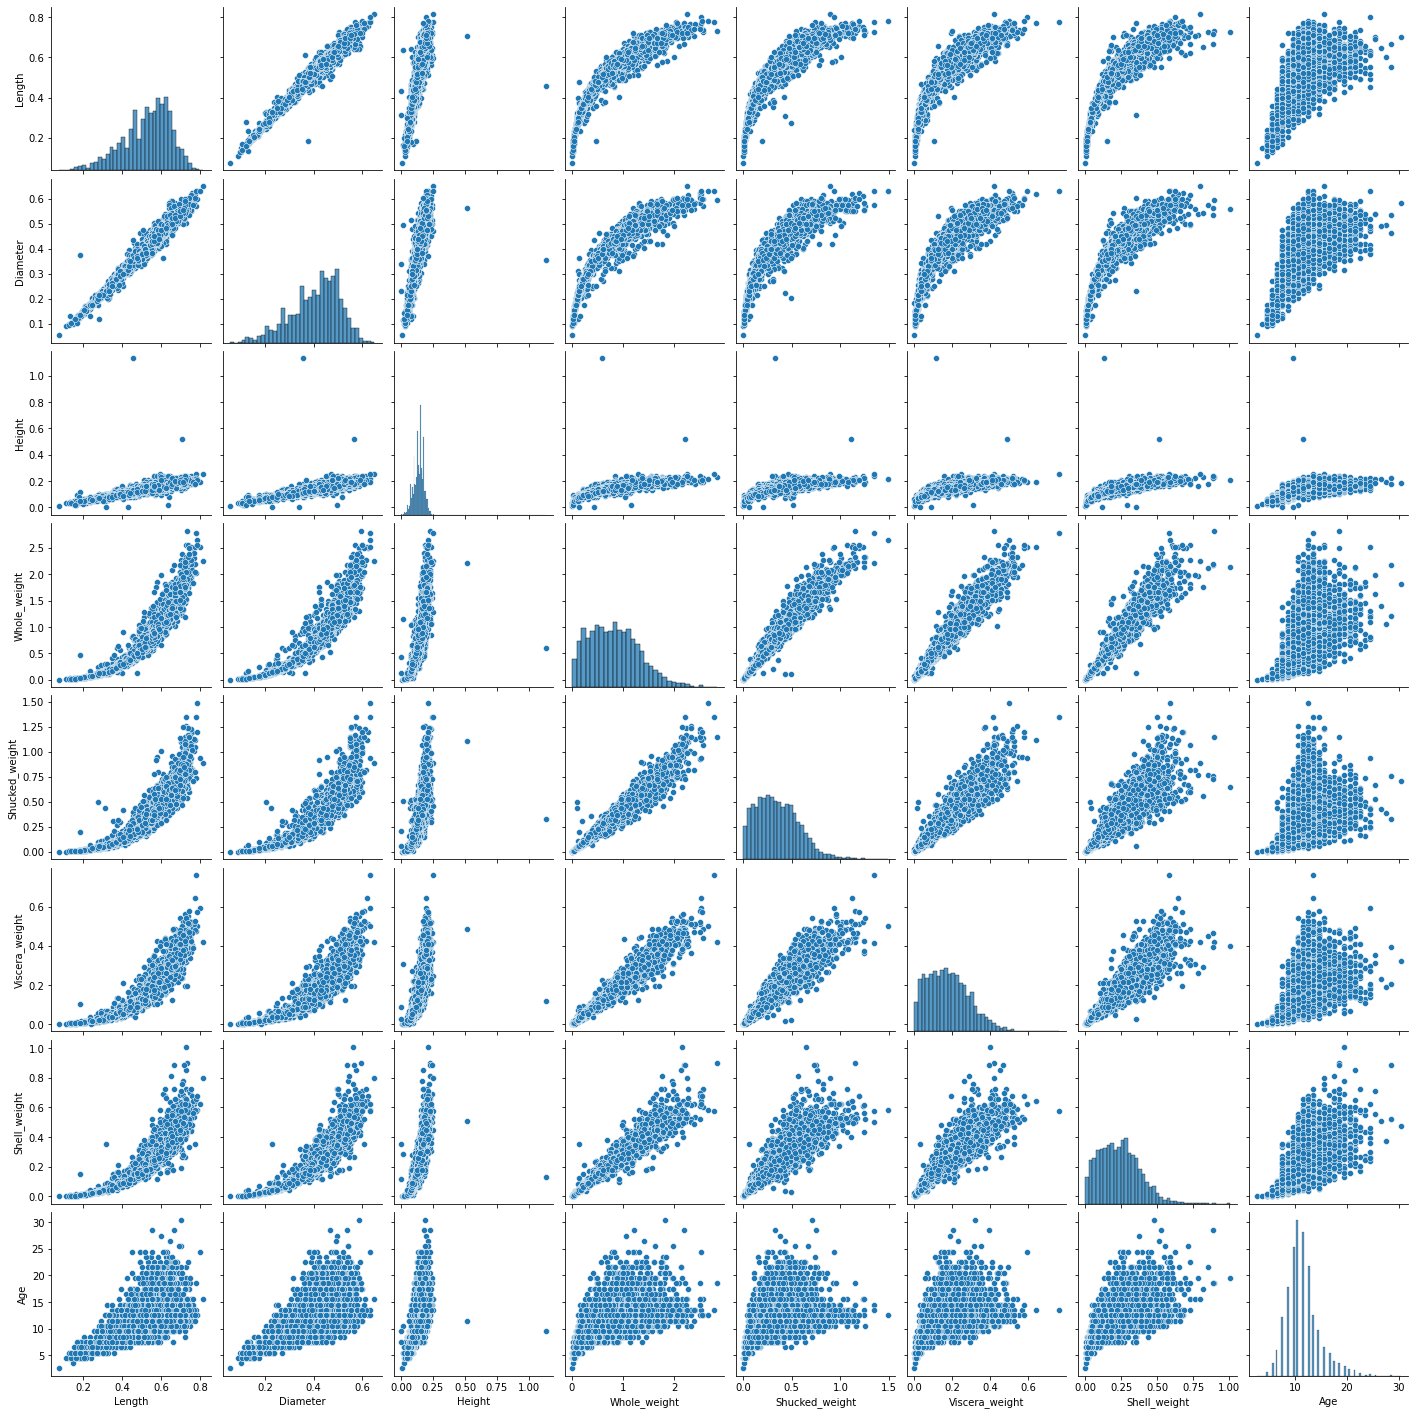

In [18]:
sns.pairplot(data)


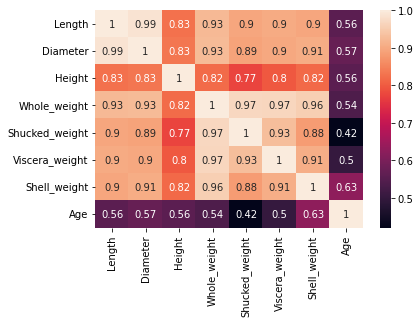

In [19]:
sns.heatmap(data.corr(), annot = True)


In [20]:
data[['Age','Length']].mean()


Age       11.433684
Length     0.523992
dtype: float64

In [21]:
data[['Age','Length']].median()


Age       10.500
Length     0.545
dtype: float64

In [22]:
data[['Age','Length']].mode()

Age  Length
0  10.5   0.550
1   NaN   0.625

In [23]:
data[['Age','Length']].var()


Age       10.395266
Length     0.014422
dtype: float64

In [24]:
data[['Age','Length']].std()


Age       3.224169
Length    0.120093
dtype: float64

In [25]:
data[['Age','Length']].describe()


Age       Length
count  4177.000000  4177.000000
mean     11.433684     0.523992
std       3.224169     0.120093
min       2.500000     0.075000
25%       9.500000     0.450000
50%      10.500000     0.545000
75%      12.500000     0.615000
max      30.500000     0.815000

In [26]:
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Age               False
dtype: bool

In [27]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

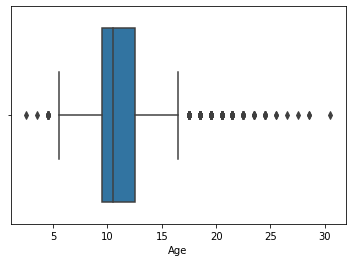

In [28]:
sns.boxplot(x=data['Age'])

In [29]:
Q1= data['Age'].quantile(0.25)
Q2=data['Age'].quantile(0.75)
print(Q1,Q2)


9.5 12.5


In [30]:
IQR=Q2-Q1
IQR

3.0

In [31]:
upper_limit =Q2 + 1.5*IQR
lower_limit =Q1 - 1.5*IQR
upper_limit
lower_limit

5.0

In [32]:
data["Age"] = np.where(data["Age"]<lower_limit,6.52,data["Age"])

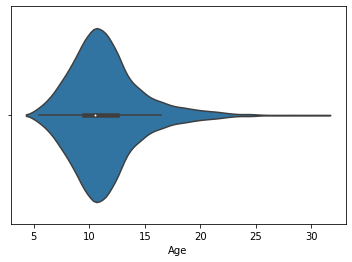

In [33]:
data["Age"] = np.where(data["Age"]<lower_limit,6.52,data["Age"])
sns.violinplot(x=data["Age"])

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
data['Age'] = le.fit_transform(data['Age'])

In [35]:
data.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Age  
0         0.150   12  
1         0.070    4  
2         0.210    6  
3         0.155    7  
4         0.055    4

In [36]:
X=data.drop(columns=['Age'],axis=1)
X.head()


Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055

In [37]:
Y=data['Age']
Y

0       12
1        4
2        6
3        7
4        4
        ..
4172     8
4173     7
4174     6
4175     7
4176     9
Name: Age, Length: 4177, dtype: int64

In [38]:
from sklearn.preprocessing import scale
X=data.drop(columns=['Shucked_weight'],axis=1)
X.head()

Sex  Length  Diameter  Height  Whole_weight  Viscera_weight  Shell_weight  \
0   M   0.455     0.365   0.095        0.5140          0.1010         0.150   
1   M   0.350     0.265   0.090        0.2255          0.0485         0.070   
2   F   0.530     0.420   0.135        0.6770          0.1415         0.210   
3   M   0.440     0.365   0.125        0.5160          0.1140         0.155   
4   I   0.330     0.255   0.080        0.2050          0.0395         0.055   

   Age  
0   12  
1    4  
2    6  
3    7  
4    4

In [ ]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 0)
X_train

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

In [ ]:
X_test

In [ ]:
X_test.shape

In [ ]:
Y_test

In [ ]:
Y_test.shape  

In [ ]:
X_train.head()  

In [ ]:
X_test.head()

In [ ]:
Y_train.head()

In [ ]:
Y_test.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print('Training accuracy: ',accuracy_score(Y_train,y_predict_train))

In [ ]:
print('Testing accuracy: ',accuracy_score(Y_test,y_predict))  

In [ ]:
pd.crosstab(Y_test,y_predict)

In [ ]:
print(classification_report(Y_test,y_predict))